<a href="https://colab.research.google.com/github/AlterCodex/03MAIR---Algoritmos-de-Optimizacion/blob/main/Algoritmos_AG1(Introducci%C3%B3n_a_Algoritmos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Guiada 1 de Algoritmos de Optimizacion

Nombre: Francisco Javier Beltran

https://colab.research.google.com/drive/1MVevAJhtaXLoV4JmoNuf9oSr44QLKAOt

https://github.com/AlterCodex/03MAIR---Algoritmos-de-Optimizacion/blob/main/Algoritmos_AG1(Introducci%C3%B3n_a_Algoritmos).ipynb

# Algoritmo de Euclides para calcular el máximo común divisor (MCD)

In [ ]:
def euclides(a, b):
    """
    Calcula el máximo común divisor (MCD) de dos números enteros a y b
    usando el Algoritmo de Euclides.
    """
    while b != 0:
        a, b = b, a % b
    return a

# Ejemplo de uso
num1 = int(input("Introduce el primer número: "))
num2 = int(input("Introduce el segundo número: "))

mcd = euclides(num1, num2)
print(f"El MCD de {num1} y {num2} es: {mcd}")



euclides(24, 12)

Introduce el primer número: 10
Introduce el segundo número: 10
El MCD de 10 y 10 es: 10


12

#Decorador python para medir el tiempo de ejecución

In [ ]:
import time

# Decorador para medir el tiempo de ejecución
def medir_tiempo(func):
    def wrapper(*args, **kwargs):
        inicio = time.perf_counter()
        resultado = func(*args, **kwargs)
        fin = time.perf_counter()
        print(f"Tiempo de ejecución de '{func.__name__}': {fin - inicio:.6f} segundos")
        return resultado
    return wrapper


# Método de Herón para aproximar la raiz cuadrada


In [ ]:
@medir_tiempo
def raiz_cuadrada_heron(n, tolerancia=1e-10, max_iteraciones=1000):
    """
    Calcula la raíz cuadrada de un número n utilizando el Método de Herón.
    Parámetros:
    - n: Número del cual calcular la raíz cuadrada (debe ser >= 0).
    - tolerancia: Precisión deseada para la solución.
    - max_iteraciones: Número máximo de iteraciones permitidas.

    Retorna:
    - Una aproximación de la raíz cuadrada de n.
    """
    if n < 0:
        raise ValueError("No se puede calcular la raíz cuadrada de un número negativo.")

    # Inicialización de la estimación (puede ser n o un valor aproximado inicial)
    x = n if n != 0 else 0.0
    iteraciones = 0

    while iteraciones < max_iteraciones:
        # Nueva estimación según el método de Herón
        nuevo_x = 0.5 * (x + n / x)

        # Si la diferencia entre iteraciones es menor que la tolerancia, detenerse
        if abs(nuevo_x - x) < tolerancia:
            return nuevo_x

        x = nuevo_x
        iteraciones += 1

    # Si no se alcanzó la tolerancia en el número máximo de iteraciones
    raise RuntimeError(f"No se alcanzó la convergencia después de {max_iteraciones} iteraciones.")

# Ejemplo de uso
numero = float(input("Introduce el número para calcular su raíz cuadrada: "))
resultado = raiz_cuadrada_heron(numero)
print(f"La raíz cuadrada de {numero} es aproximadamente {resultado}")



Introduce el número para calcular su raíz cuadrada: 125
Tiempo de ejecución de 'raiz_cuadrada_heron': 0.000010 segundos
La raíz cuadrada de 125.0 es aproximadamente 11.180339887498949


#Algoritmos de Optimización. Componentes

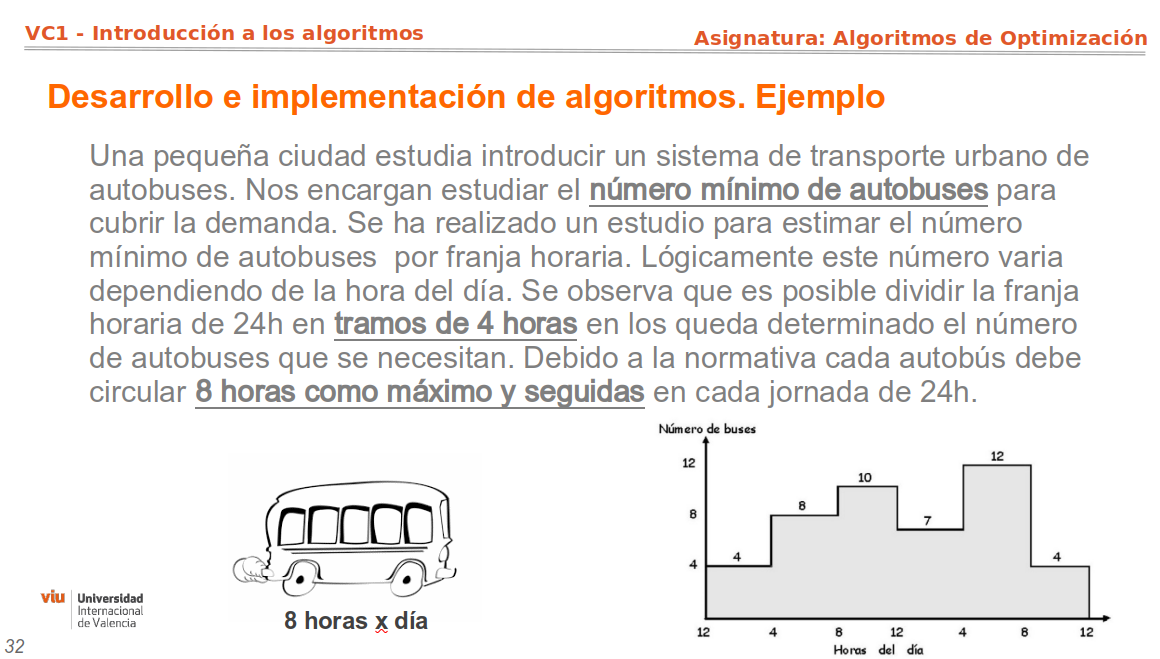

##Variables decisoras

In [ ]:
from itertools import product

# Paso 1: Inicializamos los datos
# Demanda mínima de autobuses por tramo
demanda = [4, 8, 10, 7, 12, 4]  # d[0], d[1], ..., d[5]
tramos = len(demanda)  # Número de tramos (6 en este caso)


#Restricciones

In [ ]:

#Posible Solucion
x = [4,5,6,7,8,9]
demanda = [4, 8, 10, 7, 12, 4]  # d[0], d[1], ..., d[5]

def es_solucion_viable(solucion,demanda):#Complejidad N
  tramos=len(demanda)
  for t in range(tramos):
    cobertura_actual = solucion[t] + solucion[t - 1]
    if cobertura_actual < demanda[t]:
      return False
  return True

print(es_solucion_viable(x,demanda))
print(es_solucion_viable([0],demanda))

True
False


#Función Objetivo

$$f(x) = \sum_{i=1}^{6} x_i$$

In [ ]:
#Función objetivo
f_objetivo = sum(x)

# Deficion del problema
Buscar Aquella lista circular B (buses) tal que la suma de sus elementos $f(x)=\sum_{i=1}^n x_i$ sea el minimo posible y  dada una lista Circular de restricciones D (demanda)  tal que la suma de de un elemento i de B $B_i$ y su antecesor $B_{i-1}$ de B sea siempre inferior al elmento i de D $D_i$
## Restriccion:
$$B_i+ B_{i-1} <= A_i$$
## Optimizacion
$$ min(f(x))$$
siendo $f(x)$ la funcion objetivo


In [ ]:
%%timeit


demanda = [4, 8, 10, 7, 12, 4]
tramos = len(demanda)
max_i = max(demanda)
opciones = range(0, max_i+1)  #Esto generara las M posibles combinatorias desde 0 a la cantidad maxima de autobuses

# Fuerza bruta probar todas las configuraciones posibles
mejor_solucion = None
min_buses = float('inf')
for solucion in product(opciones, repeat=tramos):#Complejidad  de la combinatoria de M*N siendo M el maximo y N la cantidad de tramos nota: gracias por la pista en los imports
  sol_temp=list(solucion) #nueva instancia copia del iterador para evitar recaestos
  if es_solucion_viable(sol_temp, demanda):#Complejidad N
    cantidad_buses = sum(solucion)
    if cantidad_buses < min_buses:
      min_buses = cantidad_buses
      mejor_solucion = list(solucion)

print("Mejor solución:", mejor_solucion)
print("Cantidad de autobuses:", min_buses)


Mejor solución: [0, 8, 2, 5, 7, 4]
Cantidad de autobuses: 26
Mejor solución: [0, 8, 2, 5, 7, 4]
Cantidad de autobuses: 26
Mejor solución: [0, 8, 2, 5, 7, 4]
Cantidad de autobuses: 26
Mejor solución: [0, 8, 2, 5, 7, 4]
Cantidad de autobuses: 26
Mejor solución: [0, 8, 2, 5, 7, 4]
Cantidad de autobuses: 26
Mejor solución: [0, 8, 2, 5, 7, 4]
Cantidad de autobuses: 26
Mejor solución: [0, 8, 2, 5, 7, 4]
Cantidad de autobuses: 26
Mejor solución: [0, 8, 2, 5, 7, 4]
Cantidad de autobuses: 26
5.6 s ± 584 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Complejidad Algoritmica:
Siendo el producto cartesiano de complejidad $O(nxm)$ y simplificando a que sea $n=m$ podemos tomar $O(n^2)$ y con esto y el ciclo interno de valor $n$ determinar una complejidad de:
$$O(n)=n^3$$
Podemos ver su crecimiento en:
imagen tomada de
https://upload.wikimedia.org/wikipedia/commons/e/ef/Numbers_and_their_cubes_es.png

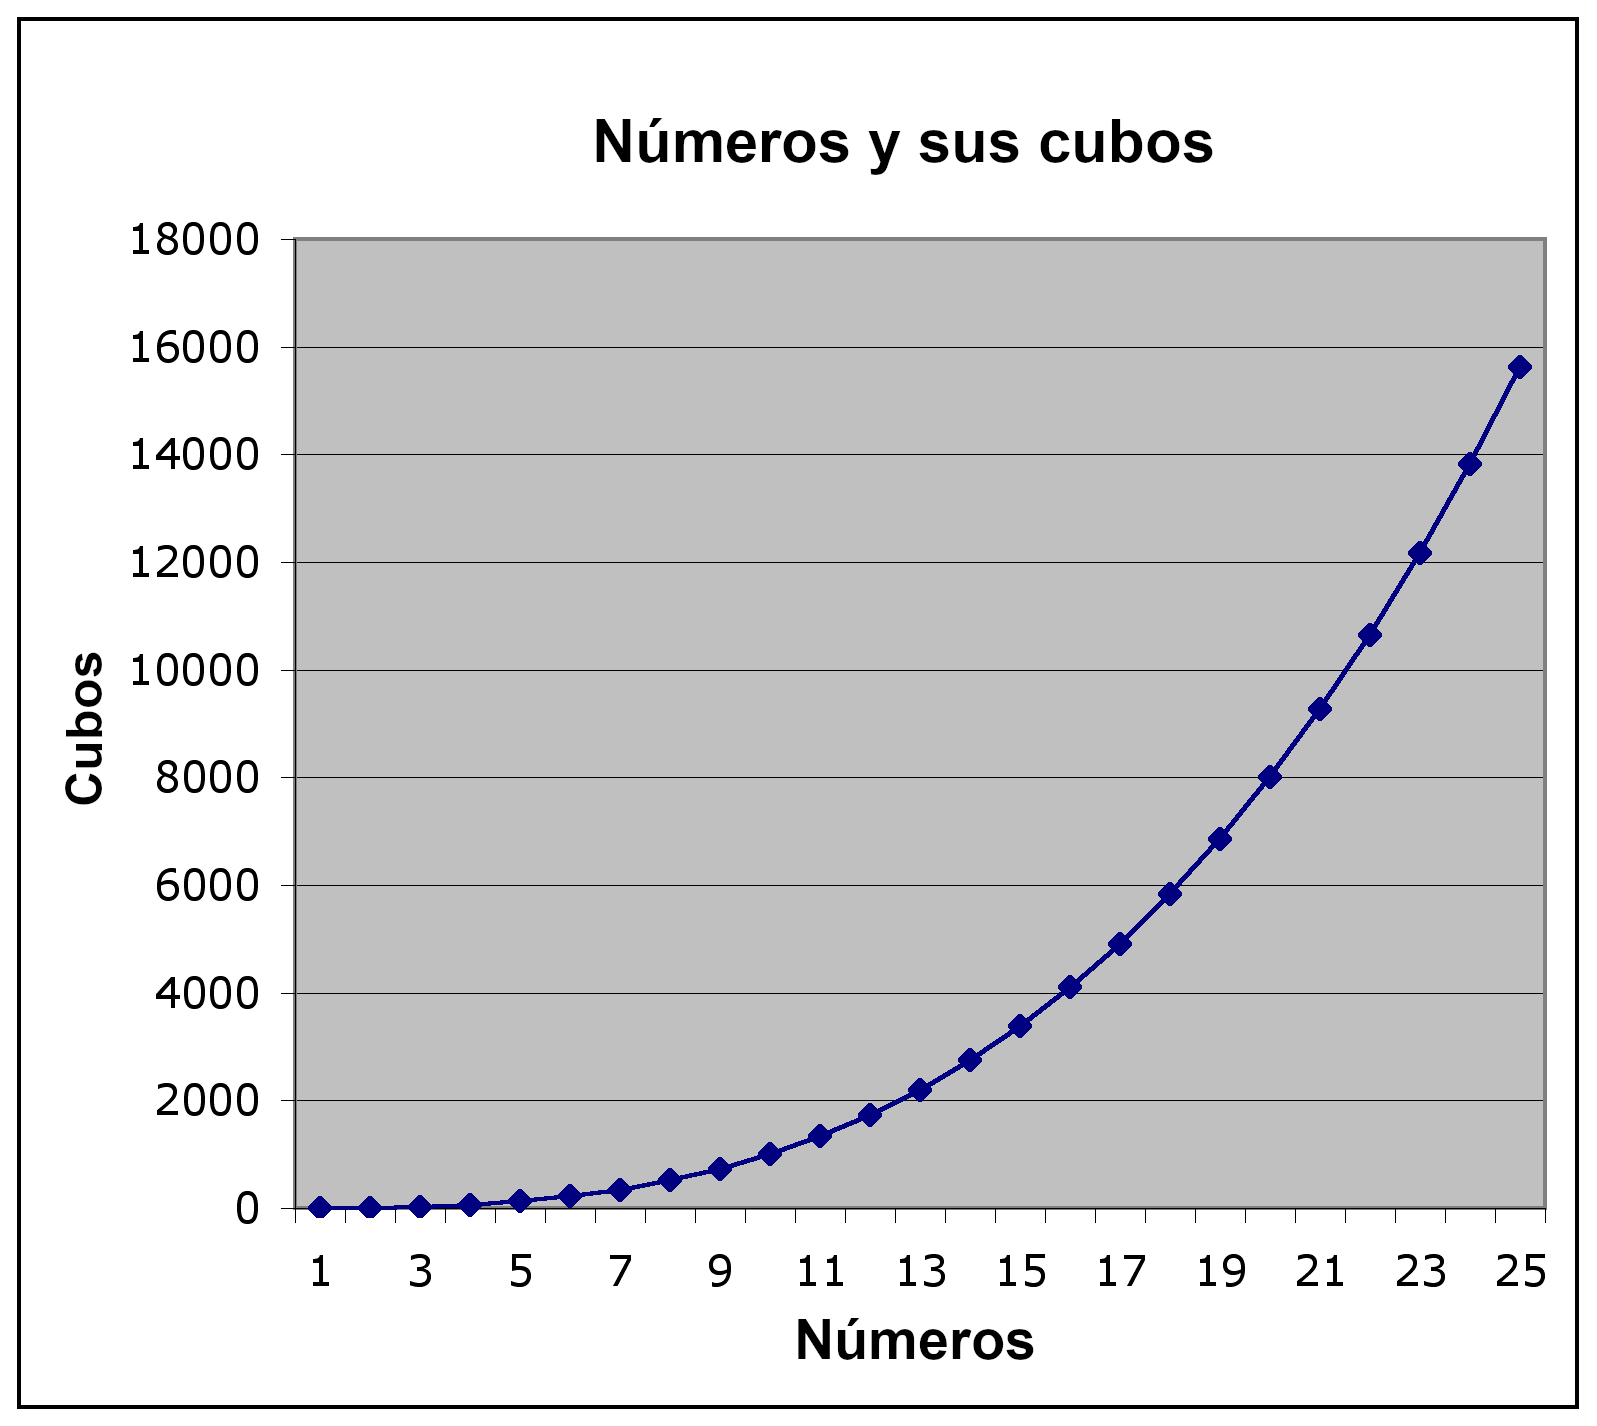